In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.functional import F
import random

In [2]:
!wget -O dinos.txt https://raw.githubusercontent.com/artemovae/NLP-seminar-LM/master/dinos.txt

--2022-03-16 14:49:43--  https://raw.githubusercontent.com/artemovae/NLP-seminar-LM/master/dinos.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19909 (19K) [text/plain]
Saving to: ‘dinos.txt’

dinos.txt           100%[===================>]  19.44K  --.-KB/s    in 0s      

2022-03-16 14:49:43 (45.3 MB/s) - ‘dinos.txt’ saved [19909/19909]



In [3]:
filename = "dinos.txt"
data = open(filename).read().strip()
print(data)
print(len(data))
data = data.replace("\n",'.')
#print(data)
data = data.lower()
print(data)

Aachenosaurus
Aardonyx
Abdallahsaurus
Abelisaurus
Abrictosaurus
Abrosaurus
Abydosaurus
Acanthopholis
Achelousaurus
Acheroraptor
Achillesaurus
Achillobator
Acristavus
Acrocanthosaurus
Acrotholus
Actiosaurus
Adamantisaurus
Adasaurus
Adelolophus
Adeopapposaurus
Aegyptosaurus
Aeolosaurus
Aepisaurus
Aepyornithomimus
Aerosteon
AetonyxAfromimus
Afrovenator
Agathaumas
Aggiosaurus
Agilisaurus
Agnosphitys
Agrosaurus
Agujaceratops
Agustinia
Ahshislepelta
Airakoraptor
Ajancingenia
Ajkaceratops
Alamosaurus
Alaskacephale
Albalophosaurus
Albertaceratops
Albertadromeus
Albertavenator
Albertonykus
Albertosaurus
Albinykus
Albisaurus
Alcovasaurus
Alectrosaurus
Aletopelta
Algoasaurus
Alioramus
Aliwalia
Allosaurus
Almas
Alnashetri
Alocodon
Altirhinus
Altispinax
Alvarezsaurus
Alwalkeria
Alxasaurus
Amargasaurus
Amargastegos
Amargatitanis
Amazonsaurus
Ammosaurus
Ampelosaurus
Amphicoelias
Amphicoelicaudia
Amphisaurus
Amtocephale
Amtosaurus
Amurosaurus
Amygdalodon
Anabisetia
Anasazisaurus
Anatosaurus
Anatotitan

In [4]:
vocab = list(set(data))
print(len(vocab))
vocab.sort()
print(vocab)
print(len(vocab))

27
['.', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
27


In [5]:
let_to_num =  {c: i for i, c in enumerate(vocab)}
print(let_to_num)
num_to_let =  {c: i for c, i in enumerate(vocab)}
print(num_to_let)

{'.': 0, 'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8, 'i': 9, 'j': 10, 'k': 11, 'l': 12, 'm': 13, 'n': 14, 'o': 15, 'p': 16, 'q': 17, 'r': 18, 's': 19, 't': 20, 'u': 21, 'v': 22, 'w': 23, 'x': 24, 'y': 25, 'z': 26}
{0: '.', 1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z'}


In [6]:
data = data.replace("."," ")
data = data.split()
random.shuffle(data)
print(data)
print(len(data))

['eustreptospondylus', 'moshisaurus', 'muttaburrasaurus', 'chondrosteosaurus', 'magulodon', 'homalocephale', 'jiangjunosaurus', 'baryonyx', 'gastonia', 'pachysaurops', 'koreanosaurus', 'proa', 'chialingosaurus', 'hanwulosaurus', 'triassolestes', 'xenotarsosaurus', 'dynamosaurus', 'angloposeidon', 'rhoetosaurus', 'lagosuchus', 'diceratusdiclonius', 'xenoposeidon', 'futabasaurus', 'sangonghesaurus', 'nedcolbertia', 'aardonyx', 'indosuchus', 'silvisaurus', 'ankistrodon', 'thotobolosaurus', 'coloradia', 'draconyx', 'pitekunsaurus', 'austroposeidon', 'arizonasaurus', 'sinopelta', 'helioceratops', 'timurlengia', 'palaeosaurus', 'phuwiangosaurus', 'gannansaurus', 'ornithotarsus', 'thecocoelurus', 'peloroplites', 'alocodon', 'nanshiungosaurus', 'jianianhualong', 'microceratops', 'cerasinops', 'ekrixinatosaurus', 'polyodontosaurus', 'antarctopelta', 'dongbeititan', 'megadactylus', 'hungarosaurus', 'haestasaurus', 'lucianosaurus', 'coronosaurus', 'lepidus', 'gigantoscelus', 'regnosaurus', 'uinta

In [7]:
class rnn(nn.Module):
  def __init__(self, input_size, hidden_size):
    super(rnn, self).__init__()

    self.input_size = input_size
    self.hidden_size = hidden_size
    self.output_size = input_size
    self.layer1 = nn.Linear(input_size + hidden_size, hidden_size)
    self.layer2 = nn.Linear(hidden_size, input_size)
    self.sigmoid = nn.Sigmoid()

  def forward(self, input, hidden):
    input_hidden = torch.cat((input, hidden), dim = 1)
    hidden = self.layer1(input_hidden)
    hidden = self.sigmoid(hidden)
    output = self.layer2(hidden)
    return hidden, output


In [8]:
lr = 10e-4
model = rnn(input_size=len(vocab), hidden_size=20)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr)

1.6714078187942505
1.6700612306594849
1.6687430143356323
1.6674498319625854
1.6661852598190308
1.6649436950683594
1.6637296676635742
1.662542462348938
1.661376953125
1.6602363586425781


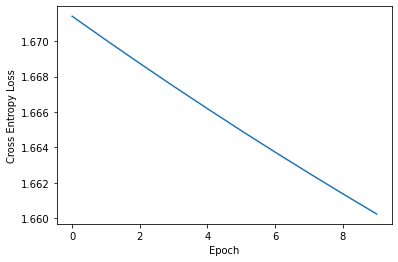

In [11]:
epoch_size = 10
hidden_size = 20
loss = []
for i in range(epoch_size):
  epoch_loss = 0
  n = 0
  for word in data:
    letters = list(word)
    #print(letters)
    hidden = torch.zeros([1, hidden_size])
    outputs = torch.zeros([len(letters)+1, len(vocab)])
    target = list()
    for i in letters:
      target.append(let_to_num[i])
    #print(target)
    target.append(let_to_num['.'])
    target_tensor = torch.LongTensor(target)
    outputs[0,let_to_num[letters[0]]] = 1
    i = 0
    batch_loss = 0
    while(i<len(letters)):
      input = torch.zeros([1,len(vocab)],dtype = torch.float)
      input[0,let_to_num[letters[i]]] = 1
      hidden, output = model(input, hidden)
      outputs[i+1] = output
      i+=1

    batch_loss = criterion(outputs, target_tensor)
    epoch_loss += batch_loss
    optimizer.zero_grad()
    batch_loss.backward()
    optimizer.step()
    n+=1
  
  epoch_loss = epoch_loss/n
  print(epoch_loss.item())
  loss.append(epoch_loss.detach().numpy())

plot = plt.figure()
plt.xlabel('Epoch')
plt.ylabel('Cross Entropy Loss')
plt.plot(loss, label = 'Training Cost')
  

In [12]:
model.eval()
hidden_size = 20

for letter in vocab:
  if (letter != "."):
    print(" ",letter,"-", end="")
    print(letter,end="")
    char = letter
    input = let_to_num[char]
    input_ten = torch.zeros([1,len(vocab)], dtype= torch.float)
    input_ten[0, input] = 1

    hidden = torch.zeros([1, hidden_size])
    idx = torch.tensor(let_to_num[letter])
    i = 0
    while num_to_let[idx.item()] != ".":
      i+=1
      hidden, output = model(input_ten, hidden)
      idx = output.argmax()
      input_ten = torch.zeros([1,len(vocab)], dtype= torch.float)
      input_ten[0,idx] = 1
      if(num_to_let[idx.item()] != "."):
        print(num_to_let[idx.item()], end="")
    print("")  


  a -angosaurus
  b -barosaurus
  c -changosaurus
  d -dangosaurus
  e -elosaurus
  f -fustosaurus
  g -gongosaurus
  h -hangosaurus
  i -ingosaurus
  j -jinosaurus
  k -kurosaurus
  l -lanosaurus
  m -mangosaurus
  n -narosaurus
  o -ornosaurus
  p -parosaurus
  q -quangosaurus
  r -rangosaurus
  s -sangosaurus
  t -tangosaurus
  u -usphosaurus
  v -venosaurus
  w -wangosaurus
  x -xinosaurus
  y -yunosaurus
  z -zhangosaurus
